# Cyberbully Prevention and Detection using Machine Learning

In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
import string, datetime
import pickle
from sklearn import metrics

In [4]:
data = pd.read_csv("./data.csv")

In [6]:
data.rename(columns = {"ans": "comment"}, inplace = True)
column = ['userid','post','asker','severity1','severity2','severity3','bully1','bully2','bully3']
data.drop(column, axis = 1, inplace = True)
data

,ques,comment,ans1,ans2,ans3
0,what&#039;s your favorite song? :D<br>,I like too many songs to have a favorite,No,No,No
1,<3,</3 ? haha jk! <33,No,No,No
2,&quot;hey angel you duh sexy&quot;,Really?!?! Thanks?! haha,No,No,No
3,(:,;(,No,No,No
4,******************MEOWWW*************************,*RAWR*?,No,No,No
5,any makeup tips? i suck at doing my makeup lol,Sure! Like tell me wht u wnna know?! Like wht...,No,No,No
6,Apriiiiiiiiiiiill!!! I miss uuuu! It&#039;s Em...,EMMA hahahahah :D I MISSSSSeddd YUHHHHh 22222...,No,No,No
7,Are you a morning or night person?,Night 4shuree!!,No,No,No
8,are you a trusting person?,alreadi answrd,No,No,No
9,are you a trusting person?,Yes veryy trustin person!!! May i help yuh:!,No,No,No


In [7]:
# examine the class distribution
data.ans1.value_counts()

No     11693
Yes     1038
Name: ans1, dtype: int64

In [8]:
data.ans2.value_counts()

No     11710
Yes     1025
Name: ans2, dtype: int64

In [9]:
data.ans3.value_counts()

No     11740
Yes      988
Name: ans3, dtype: int64

In [10]:
data.shape

(12773, 5)

In [11]:
def datacleaning(x):
    '''Make text lowercase, remove text in square brackets, remove punctuation , remove words containing numbers.
    and removing ASCII values from text'''
    x = x.lower()
    x = re.sub('\[.*?\]', '', x)
    x = re.sub('[%s]' % re.escape(string.punctuation), '', x)
    x = re.sub('\w*\d\w*', '', x)
    x = re.sub(r'\&.+\;',"",x)
    x = x.replace(r'_','')
    return x
cleaning = lambda x: datacleaning(x)

In [12]:
data['comment'] = data.comment.fillna("")
x = data.comment.apply(cleaning)
data['comment'] = x

In [13]:
data['comment'].head()

0     i like too many songs to have a favorite
1                                     haha jk 
2                           really thanks haha
3                                             
4                                         rawr
Name: comment, dtype: object

In [14]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thanigai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thanigai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Thanigai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
stop = stopwords.words('english')# remove stop words
data['comment'] = data['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [16]:
data['comment'] = data['comment'].apply(lambda x: " ".join(x for x in x.split() if len(x) > 2))# remove words less than 2 chars

In [17]:
freq = pd.Series(' '.join(data['comment']).split()).value_counts()[:10]#remove words which are used more frequently
freq = list(freq.index)
print(freq)
data['comment'] = data['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data

['lol', 'dont', 'like', 'yes', 'haha', 'know', 'think', 'would', 'really', 'love']


,ques,comment,ans1,ans2,ans3
0,what&#039;s your favorite song? :D<br>,many songs favorite,No,No,No
1,<3,,No,No,No
2,&quot;hey angel you duh sexy&quot;,thanks,No,No,No
3,(:,,No,No,No
4,******************MEOWWW*************************,rawr,No,No,No
5,any makeup tips? i suck at doing my makeup lol,sure tell wht wnna wht use,No,No,No
6,Apriiiiiiiiiiiill!!! I miss uuuu! It&#039;s Em...,emma hahahahah missssseddd yuhhhhh,No,No,No
7,Are you a morning or night person?,night,No,No,No
8,are you a trusting person?,alreadi answrd,No,No,No
9,are you a trusting person?,veryy trustin person may help yuh,No,No,No


In [18]:
data.dropna(inplace=True)

In [19]:
data['new'] = np.where((data['ans1'] == 'Yes') | (data['ans2'] == 'Yes') | (data['ans3'] == 'Yes')
                     , 'Yes', 'No')

In [20]:
data

,ques,comment,ans1,ans2,ans3,new
0,what&#039;s your favorite song? :D<br>,many songs favorite,No,No,No,No
1,<3,,No,No,No,No
2,&quot;hey angel you duh sexy&quot;,thanks,No,No,No,No
3,(:,,No,No,No,No
4,******************MEOWWW*************************,rawr,No,No,No,No
5,any makeup tips? i suck at doing my makeup lol,sure tell wht wnna wht use,No,No,No,No
6,Apriiiiiiiiiiiill!!! I miss uuuu! It&#039;s Em...,emma hahahahah missssseddd yuhhhhh,No,No,No,No
7,Are you a morning or night person?,night,No,No,No,No
8,are you a trusting person?,alreadi answrd,No,No,No,No
9,are you a trusting person?,veryy trustin person may help yuh,No,No,No,No


In [21]:
a = []
filtered_sentence = ""
bully_words = ' '.join(list(data[data['new'] == 'Yes']['comment']))
tokens = word_tokenize(bully_words)
for w in tokens: 
    if w not in stop: 
        filtered_sentence = filtered_sentence + " " + w 
bw = filtered_sentence.split()
count = Counter(bw)
freq = count.most_common(10)
a.append(freq)

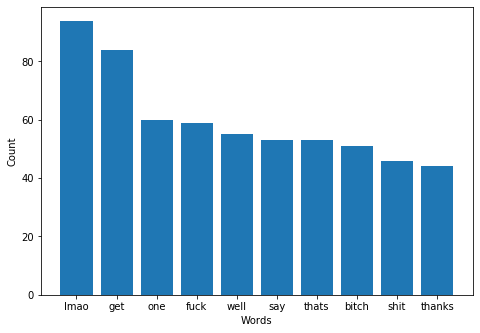

In [22]:
words, counts = [], []
for i in freq:
    words.append(i[0])
    counts.append(i[1])
#words = ['lmao','bitch','shit','fuck','whore','bastard','crap','suck','ass','fuckin\'']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(words,counts)
ax.set_ylabel('Count')
ax.set_xlabel('Words')
plt.show()

In [23]:
non_bully_words = ' '.join(list(data[data['new'] == 'No']['comment']))
filtered_sentence = ""
tokens = word_tokenize(non_bully_words)
for w in tokens: 
    if w not in stop: 
        filtered_sentence = filtered_sentence + " " + w
nbw = filtered_sentence.split()
count = Counter(nbw)
freq = count.most_common(10)
a.append(freq)

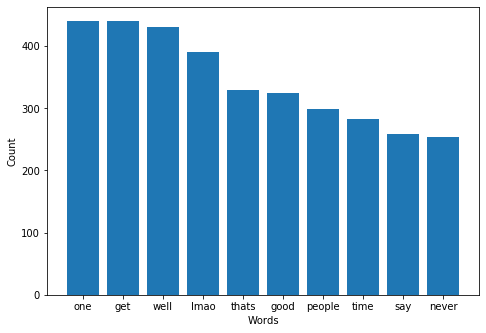

In [24]:
words, counts = [], []
for i in freq:
    words.append(i[0])
    counts.append(i[1])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(words,counts)
ax.set_ylabel('Count')
ax.set_xlabel('Words')
plt.show()

In [25]:
X = data.comment
y = data.new
print(X.shape + y.shape)


(12647, 12647)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

In [27]:
len(stop + freq)

189

In [28]:
def tokenize(tweet):
    words = word_tokenize(tweet)
    
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    lemma = WordNetLemmatizer()
    words = [lemma.lemmatize(word) for word in words]
    
    return words

vect = CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        encoding='ISO-8859-1', input='content',stop_words=stop,
        lowercase=True, max_df=1.0, min_df=1,
        ngram_range=(1, 2), token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=tokenize)

In [29]:
X_train_dtm = vect.fit_transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'ha', 'hi', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'thi', 'veri', 'wa', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [30]:
X_test_dtm = vect.transform(X_test)

In [31]:
from sklearn.neighbors import KNeighborsClassifier  
kn = KNeighborsClassifier(weights='distance', n_neighbors=3)  
kn.fit(X_train_dtm, y_train)
y_pred_class = kn.predict(X_test_dtm)
print('Accuracy is:',metrics.accuracy_score(y_test, y_pred_class))
print('Confusion Matrix is \n',metrics.confusion_matrix(y_test, y_pred_class))
print(metrics.classification_report(y_test, y_pred_class))

Accuracy is: 0.8426877470355731
Confusion Matrix is 
 [[1046   45]
 [ 154   20]]
              precision    recall  f1-score   support

          No       0.87      0.96      0.91      1091
         Yes       0.31      0.11      0.17       174

    accuracy                           0.84      1265
   macro avg       0.59      0.54      0.54      1265
weighted avg       0.79      0.84      0.81      1265



In [32]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
print('Accuracy is:',metrics.accuracy_score(y_test, y_pred_class))
print('Confusion Matrix is \n',metrics.confusion_matrix(y_test, y_pred_class))
print(metrics.classification_report(y_test, y_pred_class))

Accuracy is: 0.867193675889328
Confusion Matrix is 
 [[1083    8]
 [ 160   14]]
              precision    recall  f1-score   support

          No       0.87      0.99      0.93      1091
         Yes       0.64      0.08      0.14       174

    accuracy                           0.87      1265
   macro avg       0.75      0.54      0.54      1265
weighted avg       0.84      0.87      0.82      1265



In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_dtm, y_train)
y_pred_class = lr.predict(X_test_dtm)
print('Accuracy is:',metrics.accuracy_score(y_test, y_pred_class))
print('Confusion Matrix is \n',metrics.confusion_matrix(y_test, y_pred_class))
print(metrics.classification_report(y_test, y_pred_class))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy is: 0.8719367588932806
Confusion Matrix is 
 [[1082    9]
 [ 153   21]]
              precision    recall  f1-score   support

          No       0.88      0.99      0.93      1091
         Yes       0.70      0.12      0.21       174

    accuracy                           0.87      1265
   macro avg       0.79      0.56      0.57      1265
weighted avg       0.85      0.87      0.83      1265



In [34]:
from sklearn import svm
svl = svm.LinearSVC()
svl.fit(X_train_dtm, y_train)
y_pred_class = svl.predict(X_test_dtm)
print('Accuracy is:',metrics.accuracy_score(y_test, y_pred_class))
print('Confusion Matrix is \n',metrics.confusion_matrix(y_test, y_pred_class))
print(metrics.classification_report(y_test, y_pred_class))

Accuracy is: 0.8434782608695652
Confusion Matrix is 
 [[1035   56]
 [ 142   32]]
              precision    recall  f1-score   support

          No       0.88      0.95      0.91      1091
         Yes       0.36      0.18      0.24       174

    accuracy                           0.84      1265
   macro avg       0.62      0.57      0.58      1265
weighted avg       0.81      0.84      0.82      1265



In [35]:
l = 'you fu*king bitch'
result = []
sample = pd.Series(l)
sample_dtm = vect.transform(sample)
result.append(kn.predict(sample_dtm))
result.append(nb.predict(sample_dtm))
result.append(svl.predict(sample_dtm))
result.append(lr.predict(sample_dtm))
result

[array(['No'], dtype=object),
 array(['Yes'], dtype='<U3'),
 array(['Yes'], dtype=object),
 array(['No'], dtype=object)]

In [36]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('lr', lr), ('svl', svl), ('nb', nb) ,('kn',kn)] , voting='hard')

In [37]:
a = eclf.fit(X_train_dtm,y_train)

In [38]:
y_pred_class = eclf.predict(X_test_dtm)
print('Accuracy is:',metrics.accuracy_score(y_test, y_pred_class))
print('Confusion Matrix is \n',metrics.confusion_matrix(y_test, y_pred_class))
print(metrics.classification_report(y_test, y_pred_class))

Accuracy is: 0.8695652173913043
Confusion Matrix is 
 [[1085    6]
 [ 159   15]]
              precision    recall  f1-score   support

          No       0.87      0.99      0.93      1091
         Yes       0.71      0.09      0.15       174

    accuracy                           0.87      1265
   macro avg       0.79      0.54      0.54      1265
weighted avg       0.85      0.87      0.82      1265



In [39]:
import json
import tweepy

ACCESS_TOKEN = 'YOUR_ACCESS_TOKEN'
ACCESS_SECRET = 'YOUR_ACCESS_SECRET'
CONSUMER_KEY = 'YOUR_CONSUMER_KEY'
CONSUMER_SECRET = 'YOUR_CONSUMER_SECRET'

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

api = tweepy.API(auth, wait_on_rate_limit=True)
timeline = api.home_timeline()

In [40]:
c=0
for i in timeline:
    l = i.text
    sample = pd.Series(l)
    sample_dtm = vect.transform(sample)
    prediction = eclf.predict(sample_dtm)
    if(prediction == 'Yes'):
        c+=1;
        f = open("log.txt", "a")
        f.write("\nTweet reported and user @"+i.user.screen_name+" blocked on "+datetime.datetime.now().strftime("%d/%m/%Y, %H:%M:%S"))
        f.close()
        print("Tweet detected and user blocked..........")
        api.report_spam(True, i.user.screen_name)
if c == 0:
    print("Nothing Found ;) ");
    

Nothing Found ;) 
